In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
plt.rcParams["figure.figsize"] = (12, 8)

# Method I

In [8]:
l1 = []
l2 = []

for x in range(1,99):
    for y in range(x+5, 100):
        l1.append(x)
        l2.append(y)
        
l1 = np.array(l1)
l2 = np.array(l2)

In [9]:
def get_data(seed, x=l1, y=l2, vals = 30):
    np.random.seed(seed)
    idx = np.random.choice(len(l1), size = vals, replace=False)
    idx.sort()

    return x[idx], y[idx]

In [11]:
r_seed = 0
best_p = 0
best_corr = 1

for seed in range(1, 100000):
    x, y = get_data(seed, vals=30)
    corr, p_val = stats.pearsonr(x, y)
    if np.abs(corr) < best_corr:
        best_corr = np.abs(corr)
        r_seed = seed
        best_p = p_val
        
best_corr, best_p

(0.00012917960207798544, 0.9994594496137726)

In [12]:
x, y = get_data(r_seed, vals=30)

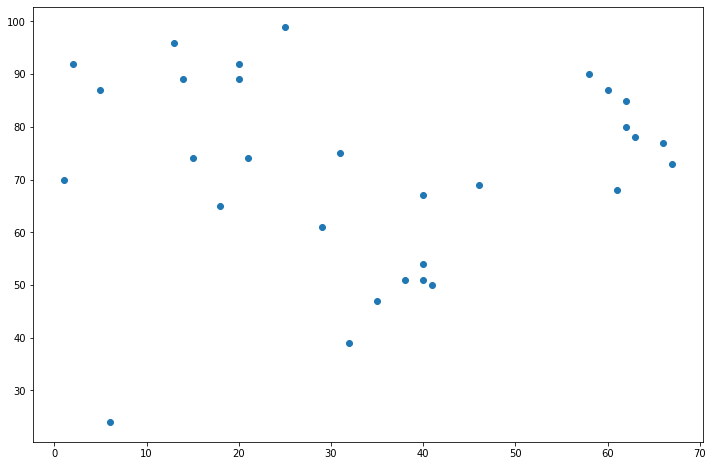

In [13]:
plt.scatter(x, y)
plt.show()